## **Exploration of Housing in Philadelphia with a focus on Logan Triangle**
#### Author: Olivia Arena

These data explore the current housing conditions in and around the Logan Triangle area of Philadelphia. Data are pulled from Census data and the Philadelphia Open Data Portal. 

### Set up

The initial steps in the process of importing and analyzing Census data require the importation of libraries to help spatially visualize the data downloaded from the Census Bureau. The first step in this process is to download pandas and geopandas libraries.

In [102]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

We also need to import relevant data pulled from the Census bureau, including a dataset of housing tenure, housing costs, and census block groups from the most recent ACS. For our study area, which does not fit into a pre-identified census geographic designation, I compiled a few census tracts which could make up a study area. The census tracts are 280, 281, 282, 283, 284, and 285 in Philadelphia County, PA. An image of the study area (satellite) from Social Explorer is included below. 

![satellite_image_pa]('images/satelliteimage.png')


In Social Explorer, I chose to run a report pulling in 2017-2021 ACS 5-year data for Census Tracts 280, 281, 282, 283, 284, 285 in Philadelphia County, PA. I selected multiple housing variables including tenure and number of housing units. The command below reads in these data in a csv format into a new dataframe.


In [103]:
df = pd.read_csv('data/R13284958_SL140.csv')

### Data Exploration

After the initial import, several first steps include exploring these data to understand the shape and structure of the dataset.

In [104]:
df.shape

(6, 177)

In [105]:
df.head()

,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,...,SE_A18001_009,PCT_SE_A18001_002,PCT_SE_A18001_003,PCT_SE_A18001_004,PCT_SE_A18001_005,PCT_SE_A18001_006,PCT_SE_A18001_007,PCT_SE_A18001_008,PCT_SE_A18001_009,SE_A18009_001
0,ACSSF,pa,140,0,9077,NaN,NaN,NaN,NaN,42,...,0,19.43,6.85,6.85,21.34,28.50,11.94,5.10,0,964
1,ACSSF,pa,140,0,9078,NaN,NaN,NaN,NaN,42,...,0,0.00,17.32,8.38,22.16,17.69,6.15,28.31,0,1030
2,ACSSF,pa,140,0,9079,NaN,NaN,NaN,NaN,42,...,0,9.52,7.34,6.53,40.16,16.32,0.00,20.13,0,953
3,ACSSF,pa,140,0,9080,NaN,NaN,NaN,NaN,42,...,0,0.00,7.16,23.68,32.97,9.36,8.89,17.94,0,925
4,ACSSF,pa,140,0,9081,NaN,NaN,NaN,NaN,42,...,0,12.08,23.12,4.73,11.73,21.19,22.07,5.08,0,886


Based on these initial exploratory commands, the dataset includes six rows (the six census tracts) and 218 columns, which likely includes all the specific intervals for each housing variable. For example, for the age of rental stock, the variable includes percentage of renter-occupied housing units built broken down by decade from 2019 to 1939 or earlier. So, there are nine variables that make up that specific indicator.

In [106]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 177 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FILEID         6 non-null      object 
 1    Geo_STUSAB         6 non-null      object 
 2    Geo_SUMLEV         6 non-null      int64  
 3    Geo_GEOCOMP        6 non-null      int64  
 4    Geo_LOGRECNO       6 non-null      int64  
 5    Geo_US             0 non-null      float64
 6    Geo_REGION         0 non-null      float64
 7    Geo_DIVISION       0 non-null      float64
 8    Geo_STATECE        0 non-null      float64
 9    Geo_STATE          6 non-null      int64  
 10   Geo_COUNTY         6 non-null      int64  
 11   Geo_COUSUB         0 non-null      float64
 12   Geo_PLACE          0 non-null      float64
 13   Geo_TRACT          6 non-null      int64  
 14   Geo_BLKGRP         0 non-null      float64
 15   Geo_CONCIT         0 non-null      float64
 16   Geo_AIANHH

As expected, the number of variables is so high because of the specific increments in which the indicators are broken down. This may become an issue later on, and it might be necessary to subset the data. 

I will need to ensure that the variables for the geographies are read in as strings rather than objects, so I am going to use code to read in the two files that I will use to append to geographic data. The first file, which was initially read in, has housing data for the census tracts that make up the Logan Neighborhood. 

In [107]:
df = pd.read_csv(
    'data/R13284958_SL140.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)


The second file has data for the entire Philadelphia County. By comparing the two geographies, I hope to be able to contextualize the housing patterns in the Logan Neighborhood, compared with Philadelphia as a whole. 

In [108]:
dfpa = pd.read_csv(
    'data/R13285245_SL140.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)


In [109]:
df.Geo_STATE.head()

0    42
1    42
2    42
3    42
4    42
Name: Geo_STATE, dtype: object

In [110]:
df.Geo_FIPS

0    42101028000
1    42101028100
2    42101028200
3    42101028300
4    42101028400
5    42101028500
Name: Geo_FIPS, dtype: object

In [111]:
df.shape

(6, 177)

Now, I want to drop variables that have no data. 

In [112]:
df.columns[df.isna().all()].tolist()


['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'Geo_UACP',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA1']

In [113]:
df = df.dropna(axis=1,how="all")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 134 entries, Geo_FILEID to SE_A18009_001
dtypes: float64(50), int64(75), object(9)
memory usage: 6.4+ KB


Here it looks like the values dropped from 177 variables to 134. However, I wonder if that is because these were variable categories, like % owner, that just had no data. This issue may be something to come back to. 

This section of work looks at tenure for housing units, and I would like to keep occupied units by owner and renter  : Tenure
         Universe:  Occupied Housing Units
         Name:      A10060
         Variables:
            A10060_001:   Occupied Housing Units:
            A10060_002:      Owner Occupied
            A10060_003:      Renter Occupied

In [115]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A10060_001',
                   'SE_A10060_002',
                   'SE_A10060_003',]

In [116]:
df2 = df[columns_to_keep]


Because I just created a new subset of the data and added it to a new dataframe, I want to double check my work. SE_A10060_001 should be the total number of occupied units, so SE_A10060_002 + SE_A10060_003 should add up to SE_A10060_001. 

In [117]:
df2.head()

,Geo_FIPS,SE_A10060_001,SE_A10060_002,SE_A10060_003
0,42101028000,1735,1107,628
1,42101028100,1917,1349,568
2,42101028200,2216,1113,1103
3,42101028300,2532,1261,1271
4,42101028400,1363,751,612


In [118]:
1107+628

1735

In testing the math on row 0, it does look like the two variables kept do add up to one another (renter and owner = total occupied units). Now I am going to rename my columns to reflect the variable names in the data dictionary.

In [119]:
df2.columns = ['FIPS',
'Occupied Housing Units',
'Owner Occupied',
'Renter Occupied',]

In [120]:
columns = list(df2)
columns

['FIPS', 'Occupied Housing Units', 'Owner Occupied', 'Renter Occupied']

Now, I want to take a look to make sure these variable names were added to the columns wihtout error.

In [121]:
df2.sample(5)

,FIPS,Occupied Housing Units,Owner Occupied,Renter Occupied
2,42101028200,2216,1113,1103
4,42101028400,1363,751,612
0,42101028000,1735,1107,628
3,42101028300,2532,1261,1271
1,42101028100,1917,1349,568


In [122]:
df2['Occupied Housing Units'].describe()


count       6.000000
mean     1813.166667
std       526.227866
min      1116.000000
25%      1456.000000
50%      1826.000000
75%      2141.250000
max      2532.000000
Name: Occupied Housing Units, dtype: float64

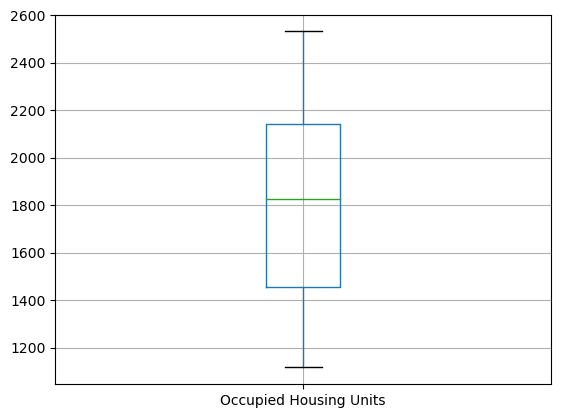

In [123]:
df2.boxplot(column=['Occupied Housing Units'])

plt.show()

Looking at this boxplot, it seems that most of the census tracts in the sample area around Logan Triangle have between 1500 and 2100 units. The average number of units is 1813 units per census tract. I wonder how this density of housing units compares to other cities? If I remember correctly, in Vinit's physical planning class, the "ideal" number of population is 20,000 people per tract. This density, even when assuming each unit has a large family, would be much lower than that density. 

In [124]:
df_sorted = df2.sort_values(by='Renter Occupied',ascending = False)


In [125]:
df_sorted.head()

,FIPS,Occupied Housing Units,Owner Occupied,Renter Occupied
3,42101028300,2532,1261,1271
2,42101028200,2216,1113,1103
0,42101028000,1735,1107,628
4,42101028400,1363,751,612
1,42101028100,1917,1349,568


In [126]:
df_sorted.head(5).plot.bar(x='FIPS',
                            y='Renter Occupied')

<AxesSubplot: xlabel='FIPS'>

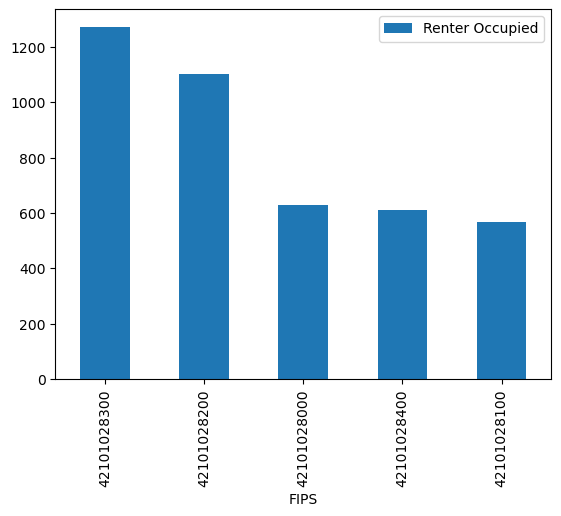

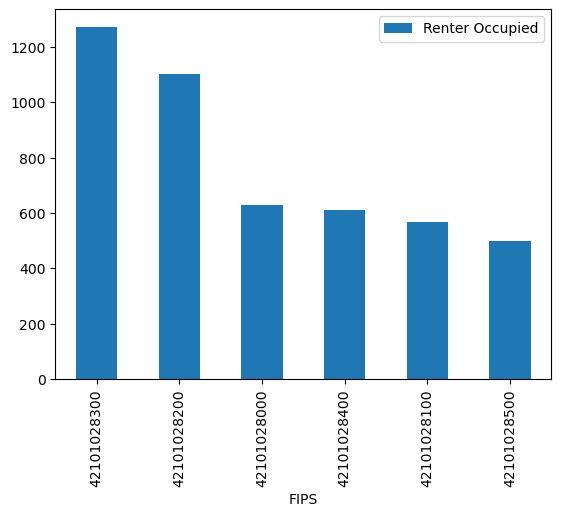

In [127]:
df_sorted.plot.bar(x='FIPS',
                    y='Renter Occupied')
plt.show()

Looking at the graph above, it looks like the highest number of renters is in Census tract 283, followed by 282. THese figures are much higher than the other three Census tracts. When we get to the mapping component, it will be interesting to see what the dividing line is.

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FIPS                    6 non-null      object
 1   Occupied Housing Units  6 non-null      int64 
 2   Owner Occupied          6 non-null      int64 
 3   Renter Occupied         6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


### Importing geographic data for mapping

Now, I will import the geographic data to be able to map the Census data on specific rtacts and visualize some of the patterns within Philadelphia. 

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt

I found a geojson file with Philadelphia Census Tracts from 2010 on the Philadelphia Open Data Portal. I am reading in the file for all of Philadelphia. Depending on the ACS dataset, I will either subset specific tracts or I will use all of the tracks in Philadelphia for comparison. 

In [130]:
tracts=gpd.read_file('data/Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


Now that the geometric data has been imported, I will run an initial plot to begin visualizing.  

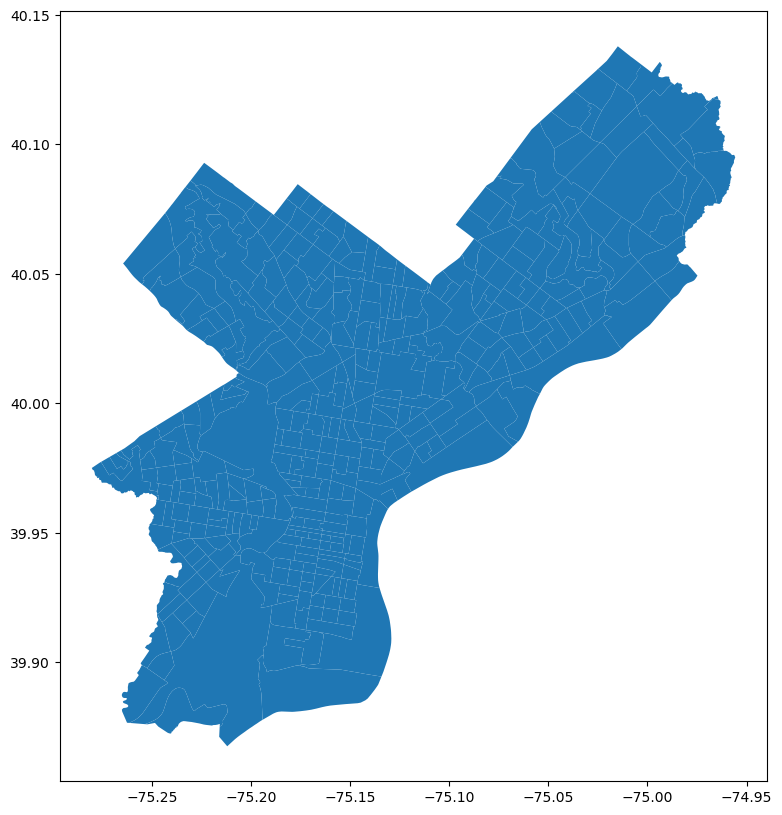

In [131]:
tracts.plot(figsize=(12,10))
plt.show()

The map above shows all of Philadelphia, PA!

In [132]:
tracts.info(verbose=True, show_counts=True)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


Now, I want to subset this dataset to only include the two variables that I need, which are the FIPS code (for joining) and the geometry (for spatial visualizing). I am dropping all variables except for the tract variable (TRACTCE9=10) and the geometry variable. 

In [133]:
tracts = tracts[['TRACTCE10','geometry']]
tracts.head()

,TRACTCE10,geometry
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


As explained above, to get the full FIPS code for the tract, I will need the state and city codes for Philadelphia. Then, I will merge these codes to the specific tract codes. 

In [134]:
tracts['FIPS'] ='42' + '101' + tracts['TRACTCE10']


/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


I wanted to make sure that the new variable was created, so I printed and below I tried it the way it is written in the lab notes.

In [135]:
print(tracts)

    TRACTCE10                                           geometry         FIPS
0      009400  POLYGON ((-75.22927 39.96054, -75.22865 39.960...  42101009400
1      009500  POLYGON ((-75.23536 39.96852, -75.23545 39.969...  42101009500
2      009600  POLYGON ((-75.24343 39.96230, -75.24339 39.962...  42101009600
3      013800  POLYGON ((-75.17341 39.97779, -75.17386 39.977...  42101013800
4      013900  POLYGON ((-75.17313 39.97776, -75.17321 39.977...  42101013900
..        ...                                                ...          ...
379    037200  POLYGON ((-75.17135 39.91678, -75.17143 39.916...  42101037200
380    038300  POLYGON ((-75.11627 40.01743, -75.11660 40.017...  42101038300
381    039000  POLYGON ((-75.08824 40.04034, -75.08820 40.040...  42101039000
382    037800  POLYGON ((-75.11051 39.96952, -75.10676 39.970...  42101037800
383    037700  POLYGON ((-75.15170 39.98571, -75.15249 39.985...  42101037700

[384 rows x 3 columns]


In [136]:
tracts.head()


,TRACTCE10,geometry,FIPS
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",42101009400
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",42101009500
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",42101009600
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",42101013800
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",42101013900


In [137]:
df2.head()

,FIPS,Occupied Housing Units,Owner Occupied,Renter Occupied
0,42101028000,1735,1107,628
1,42101028100,1917,1349,568
2,42101028200,2216,1113,1103
3,42101028300,2532,1261,1271
4,42101028400,1363,751,612


Having imported the geographic data and created the FIPS variable that will enable me to merge the two files, it is time to merge. I merge the file with geometry to the file of ACS with housing data into a new file "tracts_tenure."

In [138]:
tracts_tenure= tracts.merge(df2,on='FIPS')
#tracts_tenure = df2.merge(tracts,on='FIPS')

Now I want to see how the merge worked! 

In [139]:
tracts_tenure.head()

,TRACTCE10,geometry,FIPS,Occupied Housing Units,Owner Occupied,Renter Occupied
0,028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",42101028300,2532,1261,1271
1,028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",42101028400,1363,751,612
2,028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",42101028500,1116,616,500
3,028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",42101028000,1735,1107,628
4,028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",42101028100,1917,1349,568


In [140]:
tracts_tenure.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   TRACTCE10               6 non-null      object  
 1   geometry                6 non-null      geometry
 2   FIPS                    6 non-null      object  
 3   Occupied Housing Units  6 non-null      int64   
 4   Owner Occupied          6 non-null      int64   
 5   Renter Occupied         6 non-null      int64   
dtypes: geometry(1), int64(3), object(2)
memory usage: 336.0+ bytes


The benefit of including geographic data is to be able to map, so I am going to try out a quick plot of the number of renter occupied units with natural breaks in the data to mark different colors. 

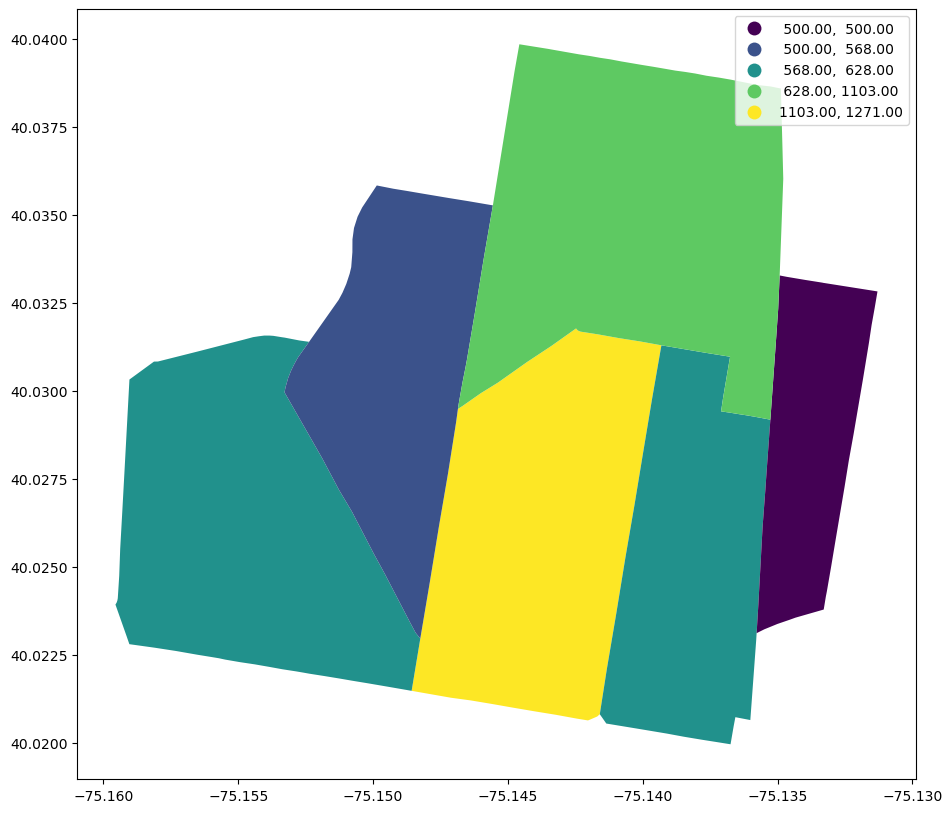

In [141]:
tracts_tenure.plot(figsize=(12,10),
                 column='Renter Occupied',
                 legend=True, 
                 scheme='NaturalBreaks')
plt.show()

While this map doesn't show trends overall, I do see that the two tracts that have the highest number of renters are stacked on top of each other. They have the same border on the lefthand side. I will have to look into what that road means.

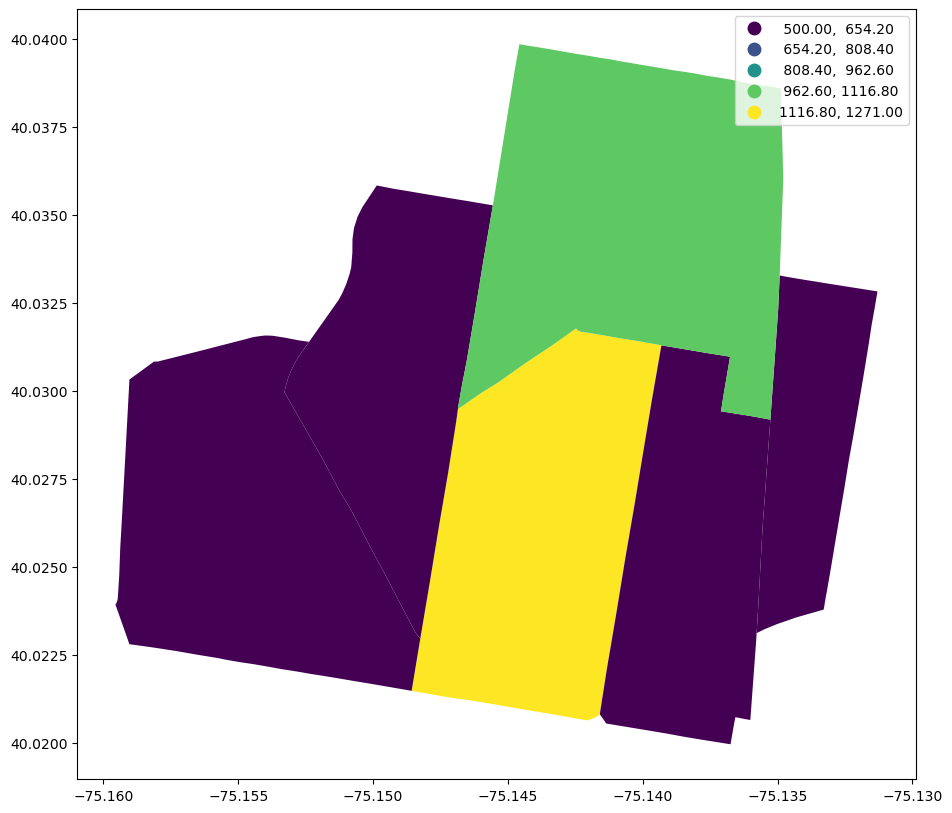

In [142]:
tracts_tenure.plot(figsize=(12,10),
                 column='Renter Occupied',
                 legend=True, 
                 scheme='equal_interval')
plt.show()

Again, using equal intervals, the two census tracts (283 and 282) have the highest number of renters.

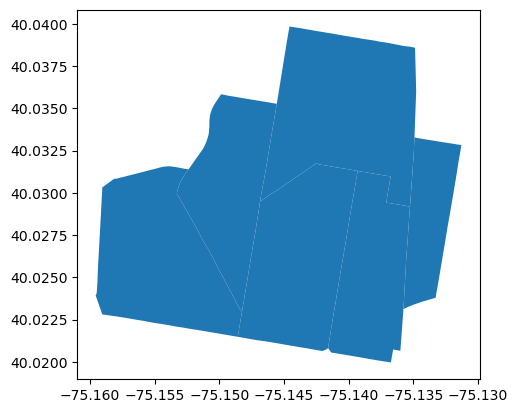

In [143]:
tracts_tenure.plot()
plt.show()

Now, I want to compare the number of renters in a more proportional way. It's helpful to see the number of renters across the tracts, but what does it mean in the context of tenure? Are more places rented or owner occupied? What is the context for the specific numbers? I am going to make a new variable for both renters and owners that is the percentage of renter occupied or owner occupied units out of the total number of occupied housing units. 

In [144]:
tracts_tenure['PCT_Renter'] = tracts_tenure['Renter Occupied']/tracts_tenure['Occupied Housing Units']*100
tracts_tenure['PCT_Owner'] = tracts_tenure['Owner Occupied']/tracts_tenure['Occupied Housing Units']*100

Now, I hope to try visualizing these data, starting by first looking at the percentages. They range form 30% to 51% renters. So across the board, these tracts are either equally renter and owner or mostly owner. 

In [145]:
tracts_tenure['PCT_Renter'].head()

0    50.197472
1    44.900954
2    44.802867
3    36.195965
4    29.629630
Name: PCT_Renter, dtype: float64

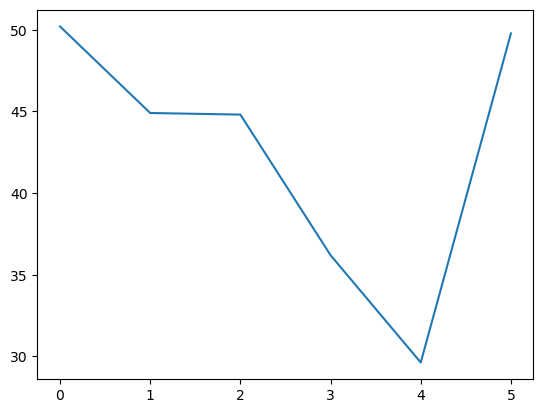

In [146]:
tracts_tenure['PCT_Renter'].plot()
plt.show()

Plotting this data doesn't make the most amount of sense (as seen above) because these are not showing a linear pattern over time or a change. These data are more of a commparison between the tracts at a given time (2021). So, instead, I am going to try to looking at these percentages like the maps above.

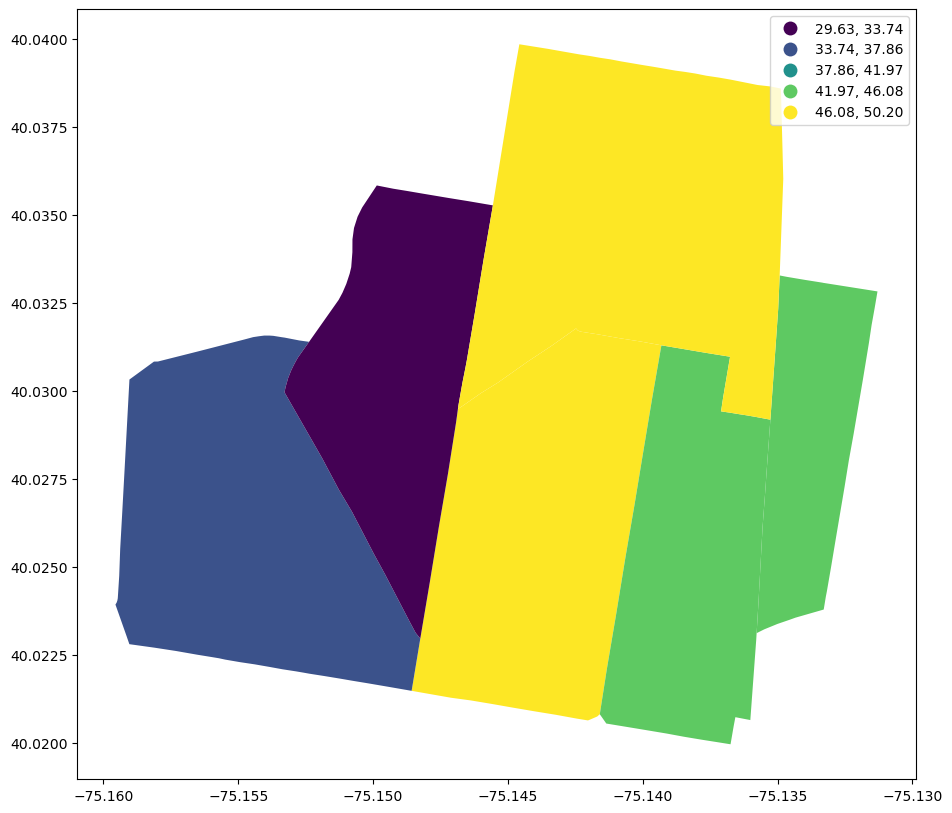

In [147]:
tracts_tenure.plot(figsize=(12,10),
                 column='PCT_Renter',
                 legend=True, 
                 scheme='equal_interval')

plt.show()

Before, I looked at renter occupied units with equal intervals. Now, I will try out the natural break and quantiles options for visualizing to see if there are differences.

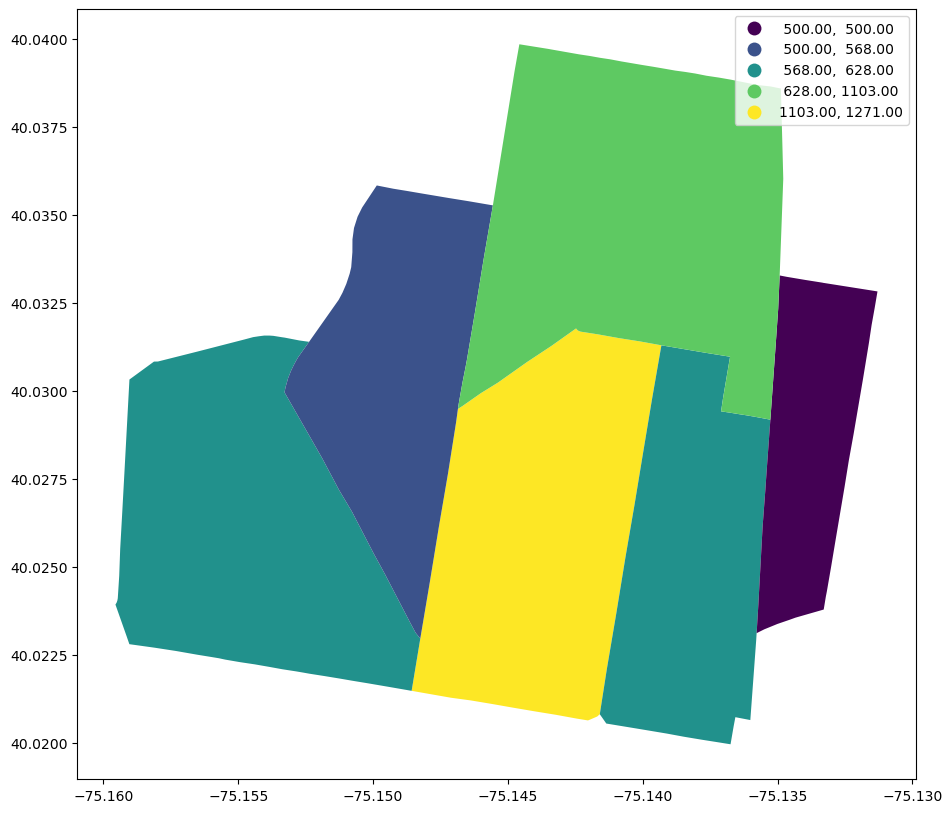

In [148]:
tracts_tenure.plot(figsize=(12,10),
                 column='Renter Occupied',
                 legend=True, 
                 scheme='NaturalBreaks')

plt.show()

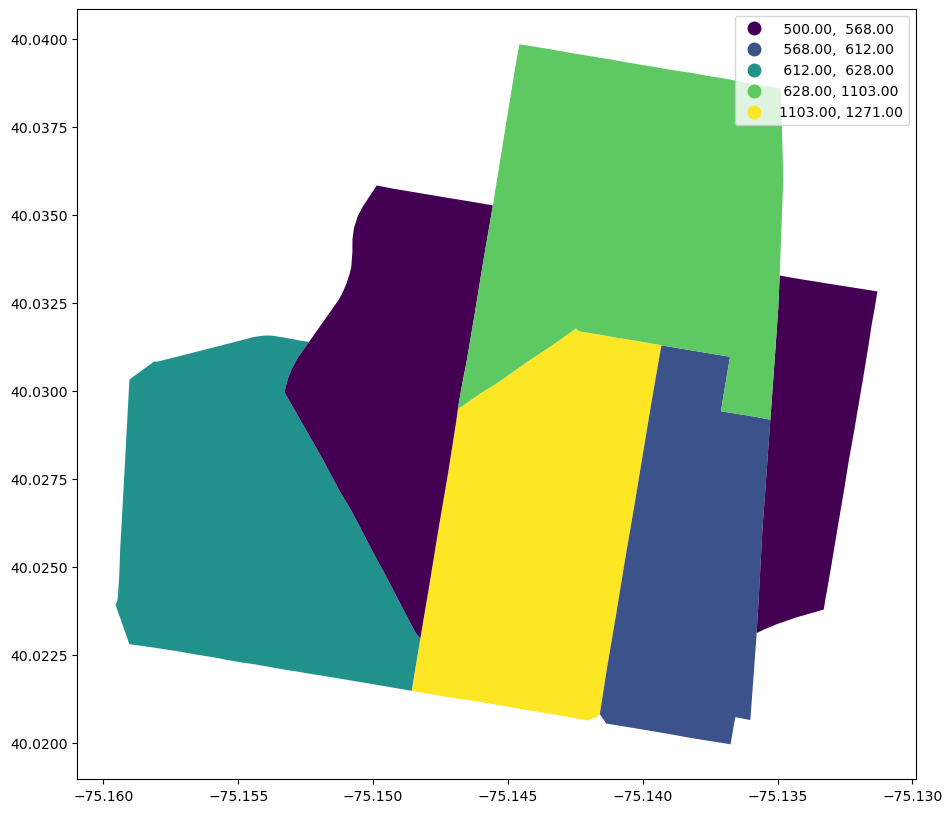

In [149]:
tracts_tenure.plot(figsize=(12,10),
                 column='Renter Occupied',
                 legend=True, 
                 scheme='Quantiles')

plt.show()

Again, these maps show the same main takeaway-- there are more renters in the two census tracts in the center of the neighborhood. 

#### Folium Mapping 

Another opportunity to visualize some of the spatial data is in folium. I am first going to import the folium library, and then begin my viewing the specific census tracts that I selected in Philly.

In [150]:
import folium

Below, I am going to visualize both the tract level data for both the idenitifed Logan Neighborhood and the larger Philadelphia County. I plan to use the created variable for percent renter occupied on both chloropleth maps to show the gradient. 

In [151]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m

In [152]:
# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_tenure, # geo data
                  data=tracts_tenure, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_Renter'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Percent Renter Occupied Units in Logan Neighborhood (2021)').add_to(m)    # name on the legend color bar
m

In [153]:
m.save('Logan_Triangle_Housing_Tenure.html')

## Comparison to Philadelphia-County

Now, I am going to try to map some of these same variables at the Philadelphia County level because Philadelphia has the same borders as Philadelphia County, and the dataset pulled from the City's database is at the County-level. I am going to run the same code that I did for the specific tracts and make comparisons.

In [154]:
dfpa.columns[dfpa.isna().all()].tolist()


['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'Geo_UACP',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA1']

In [155]:
dfpa = dfpa.dropna(axis=1,how="all")

After an initial look at the columns and a drop of the variables that are empty, I am going to just keep the FIPS and the tenure data.

In [156]:
columns_to_keep_pa = ['Geo_FIPS',
                   'SE_A10060_001',
                   'SE_A10060_002',
                   'SE_A10060_003',]

In [157]:
df2pa = dfpa[columns_to_keep_pa]


In [158]:
columns = list(df2pa)
columns

['Geo_FIPS', 'SE_A10060_001', 'SE_A10060_002', 'SE_A10060_003']

I will also rename the columns to more clearly show the content of the variables.

In [159]:
df2pa.columns = ['FIPS',
'Occupied Housing Units',
'Owner Occupied',
'Renter Occupied',]

In [160]:
df2pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FIPS                    408 non-null    object
 1   Occupied Housing Units  408 non-null    int64 
 2   Owner Occupied          408 non-null    int64 
 3   Renter Occupied         408 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.9+ KB


Similar to above, I am going to merge the two datasets based on the common variable -- 'FIPS'. 

In [161]:
pa_tenure= tracts.merge(df2pa,on='FIPS')


Now, to get a better sense of the percentage of renters in a specific tract, I am going to create a new variable for the percentage of owners and renters in a given tract. 

In [162]:
pa_tenure['PCT_Renter'] = pa_tenure['Renter Occupied']/pa_tenure['Occupied Housing Units']*100
pa_tenure['PCT_Owner'] = pa_tenure['Owner Occupied']/pa_tenure['Occupied Housing Units']*100

Using the folium mapping functions, I am going to map out the county-level tenure data.

In [163]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m

In [164]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=pa_tenure, # geo data
                  data=pa_tenure, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_Renter'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Percent Renter Occupied Units in Philadelphia (2021)').add_to(m)    # name on the legend color bar
m

In [165]:
m.save('Philadelphia_Housing_Tenure.html')

In the initial look over the map, it seems like the tracts with the higher percentage of renters are concentrated around downtown Philadelphia, and running out specifically along N Broad. In looking at the tracts that make up the Logan Neighborhood, there are actually lower percentages of renters than in adjacent tracts. The tracts range from 17-67% of renters. It makes me wonder, knowing the history of the neighborhood, if the owners are longtime owners. The neighborhood is not facing gentrification, and because of the immediate environmental harms, there is not new construction happening. 

### Static Maps

Now that I have had a chance to get a sense of the data both at the tract-level and at the city-level, I want to make some pretty maps!!! The dataset I will use for the neighborhood around the Logan Triangle is tracts_tenure. The dataset I will use for the entire Philadelphia area is pa_tenure.

#### Logan Neighborhood

I am going to map the percentage of renter occupied units in the Logan Neighborhood. I want to make it pretty, so I am going to change the color-scheme to be a more muted palette. I am also going to create a horizontal legend and remove the axes to make the map cleaner. 

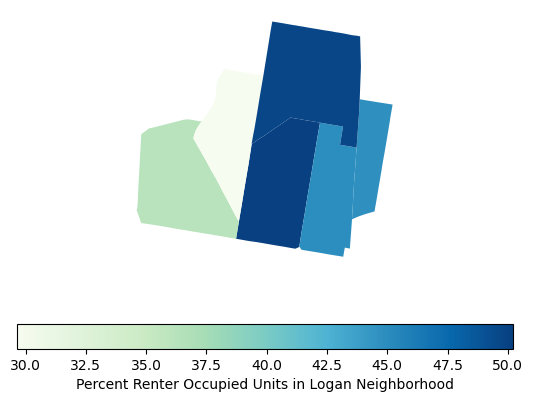

In [166]:
ax1 =tracts_tenure.plot(column='PCT_Renter',
                   legend=True,
  legend_kwds={'label': "Percent Renter Occupied Units in Logan Neighborhood",
                        'orientation': "horizontal"},
               cmap='GnBu');

ax1.set_axis_off()
plt.show()

As seen above, the two census tracts with the highest percentage of renters are in the center of the neighborhood. However, these areas still have up to half of their occupied units as renter occupied. 

#### Philadelphia

As a comparison, I am going to map the percentage of renter occupied units in Philadelphia. Similar to above, I am going to more to a more muted palette. I am also going to create a horizontal legend and remove the axes to make the map cleaner. 

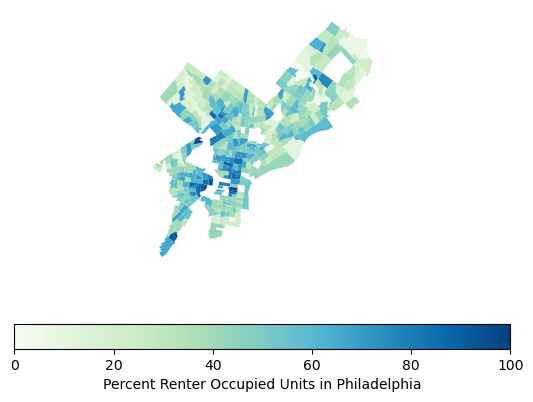

In [167]:
ax2 = pa_tenure.plot(column='PCT_Renter',
                   legend=True,
  legend_kwds={'label': "Percent Renter Occupied Units in Philadelphia",
                        'orientation': "horizontal"},
               cmap='GnBu');
ax2.set_axis_off()
plt.show()


As a point of comparison, the map of all of Philadelphia shows that there are tracts that have a much higher percentage of renters. Several tracts have close to 100% renters. Other tracts, in the northwest and northeast parts of Philadelphia, there are fewer renters. The Logan Neighborhood seems to be in an area surrounded by tracts with higher-levels of renters, but Logan doesn't have the highest percentage in the City. 